# 와인 품질(Quality) 분류 경진대회

- https://dacon.io/competitions/open/235610/overview/description

- 목표 : 와인 품질 분류 머신러닝 모델 개발

## 패키지 Import

데이터과학 기본
- numpy
- pandas

In [1]:
import numpy as np
import pandas as pd

### 데이터 불러오기

1. 다운로드 받은 train.csv 파일의 경로를 입력해서 데이터를 가져와주세요 ! (DATA_DIR)


- 데이터 구조
    - index 구분자
    - quality 품질
    - fixed acidity 산도
    - volatile acidity 휘발성산
    - citric acid 시트르산
    - residual sugar 잔당 : 발효 후 와인 속에 남아있는 당분
    - chlorides 염화물
    - free sulfur dioxide 독립 이산화황
    - total sulfur dioxide 총 이산화황
    - density 밀도
    - pH 수소이온농도
    - sulphates 황산염
    - alcohol 도수
    - type 종류

In [2]:
# /content/test.csv
DATA_DIR = '/content' # .

In [4]:
df_wine = pd.read_csv(f"{DATA_DIR}/train.csv", index_col=0)
df_wine.head().T

index,0,1,2,3,4
quality,5,5,5,6,6
fixed acidity,5.6,8.8,7.9,7.0,7.8
volatile acidity,0.695,0.61,0.21,0.21,0.4
citric acid,0.06,0.14,0.39,0.31,0.26
residual sugar,6.8,2.4,2.0,6.0,9.5
chlorides,0.042,0.067,0.057,0.046,0.059
free sulfur dioxide,9.0,10.0,21.0,29.0,32.0
total sulfur dioxide,84.0,42.0,138.0,108.0,178.0
density,0.99432,0.9969,0.99176,0.9939,0.9955
pH,3.44,3.19,3.05,3.26,3.04


### EDA

시각화
- matplotlib
- seaborn

1. 데이터의 열 별 정보를 확인 (결측치 확인)
2. 변수간 상관관계 확인
3. 변수 별 분포 확인

In [5]:
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns

#경고 메시지 숨기기
import warnings
warnings.filterwarnings(action='ignore')

In [6]:
df_wine.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5497 entries, 0 to 5496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   quality               5497 non-null   int64  
 1   fixed acidity         5497 non-null   float64
 2   volatile acidity      5497 non-null   float64
 3   citric acid           5497 non-null   float64
 4   residual sugar        5497 non-null   float64
 5   chlorides             5497 non-null   float64
 6   free sulfur dioxide   5497 non-null   float64
 7   total sulfur dioxide  5497 non-null   float64
 8   density               5497 non-null   float64
 9   pH                    5497 non-null   float64
 10  sulphates             5497 non-null   float64
 11  alcohol               5497 non-null   float64
 12  type                  5497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 601.2+ KB


<AxesSubplot:>

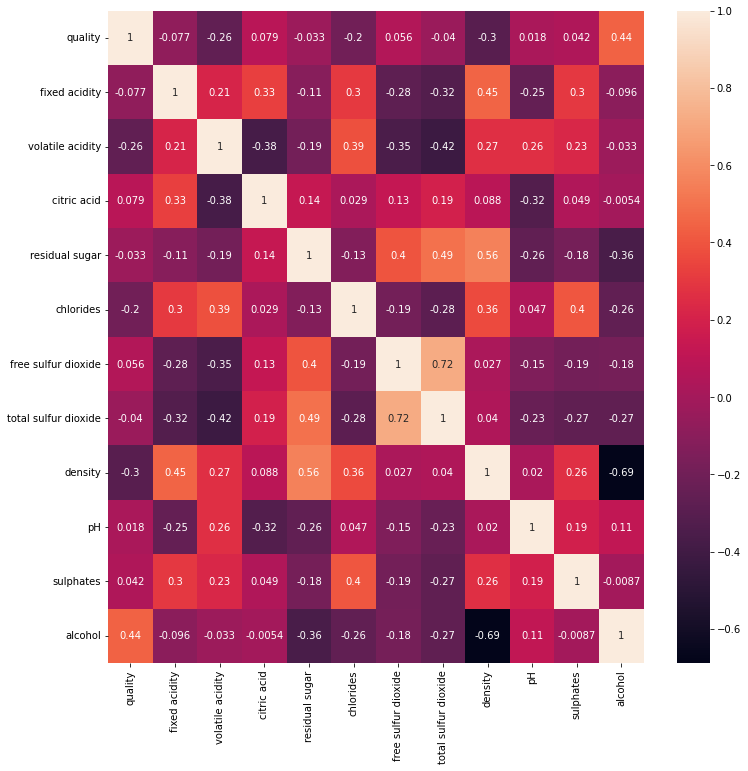

In [7]:
# seaborn의 heatmap함수를 통해 불러온 데이터프레임의 상관계수들을 시각화해주세요 ! 
# 데이터프레임 corr() 메서드
plt.figure(figsize=(12, 12))
sns.heatmap(data=df_wine.corr(), annot=True)

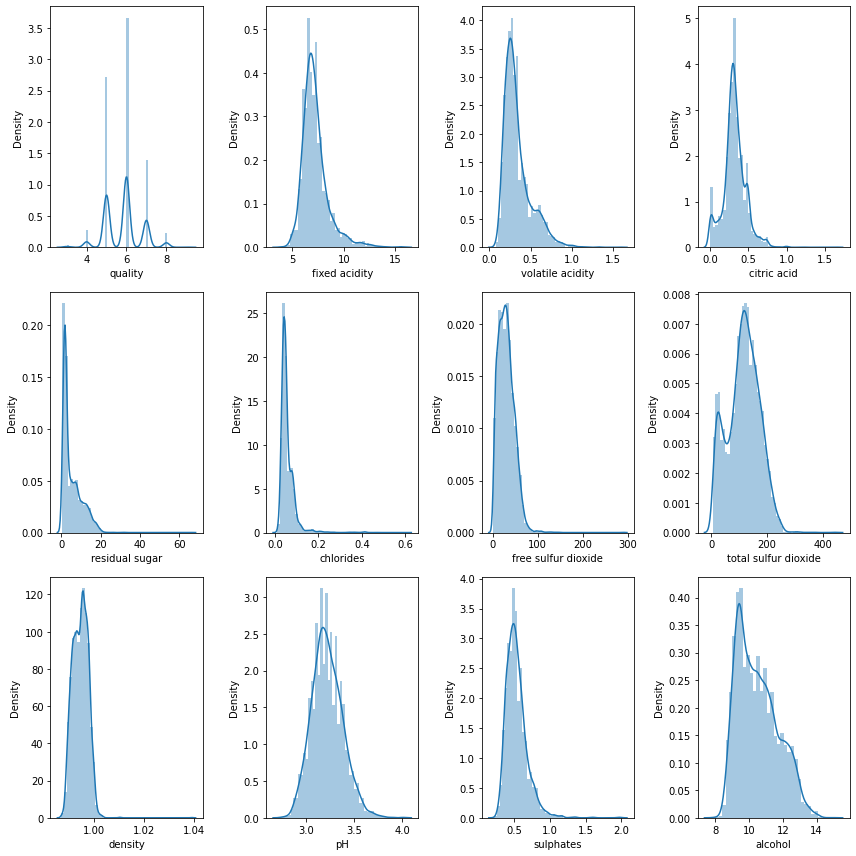

In [8]:
# 각 칼럼별 분포 확인
plt.figure(figsize=(12, 12))
for i in range(12):
    plt.subplot(3, 4, i+1)
    sns.distplot(df_wine.iloc[:, i])
plt.tight_layout()
plt.show()

### 데이터 전처리

1. Scaler
2. 범주형 변수 처리

+ 제출 후, 추가적인 전처리를 해보세요 !

In [9]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [10]:
df_wine.columns

Index(['quality', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'type'],
      dtype='object')

In [11]:
sds = StandardScaler()

# 숫자형 칼럼만 넣어주세요 !
numeric_columns = ['fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',]

df_wine_norm = sds.fit_transform(df_wine[numeric_columns])

In [13]:
df_wine_norm.shape

(5497, 11)

In [14]:
df_wine['type'].unique()

array(['white', 'red'], dtype=object)

In [16]:
enc.fit_transform(df_wine['type'])

array([1, 0, 1, ..., 1, 1, 1])

In [ ]:
np.hstack([df_wine_norm, enc.fit_transform(df_wine['type']).reshape(-1, 1)]).shape

In [20]:
enc = LabelEncoder()
train_data = np.hstack([df_wine_norm, enc.fit_transform(df_wine['type']).reshape(-1, 1)])

# 위의 scaler와 encoder는 test 데이터셋에도 동일하게 적용해야 합니다.

In [21]:
train_data.shape
#5497, 12

(5497, 12)

### 모델링

1. Logistic Regression (로지스틱 회귀)
2. Decision Tree (의사결정 나무)
3. Random Forest (랜덤포레스트)
4. XGBoost (XGBoost)

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

In [46]:
model_lr = LogisticRegression()
model_dt = DecisionTreeClassifier(criterion = 'entropy', max_depth = 1, random_state = 0)
model_rf = RandomForestClassifier(n_estimators = 8, random_state = 0)
model_xgb = xgb.XGBClassifier()

### 학습

1. 데이터를 학습, 검증데이터로 분리해주세요 !
2. 학습데이터에서 독립변수와 종속변수와를 구분하고 모델을 학습시켜주세요.
3. 검증데이터로 점수를 확인해보세요 !  
    3-1. 랜덤포레스트, XGBoost는 Feature Importance도 확인해주세요 !
4. 하이퍼파라미터 튜닝을 해보세요.
    - GridSeacrCV

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
# 위에처 전처리한 학습 데이터와 타겟변수를 넣어주세요 !
train_x, valid_x, train_y, valid_y = train_test_split(train_data, df_wine['quality'], 
                                                        test_size=0.2, shuffle=True)

In [29]:
(train_y-3).unique()

array([4, 5, 1, 2, 3, 0, 6])

In [ ]:
# 나중에 예측 시 +3 해주기

In [48]:
# model_lr.fit(train_x, train_y)
# model_dt.fit(train_x, train_y)
# model_rf.fit(train_x, train_y)
model_xgb.fit(train_x, train_y-3)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [31]:
print('train score : {:.3f}'.format(model_lr.score(train_x, train_y)))
print('test socre : {:.3f}'.format(model_lr.score(valid_x, valid_y)))

train score : 0.541
test socre : 0.554


In [32]:
print('train score : {:.3f}'.format(model_dt.score(train_x, train_y)))
print('test socre : {:.3f}'.format(model_dt.score(valid_x, valid_y)))

train score : 0.467
test socre : 0.489


In [33]:
print('train score : {:.3f}'.format(model_rf.score(train_x, train_y)))
print('test socre : {:.3f}'.format(model_rf.score(valid_x, valid_y)))

train score : 0.980
test socre : 0.670


In [34]:
print('train score : {:.3f}'.format(model_xgb.score(train_x, train_y-3)))
print('test socre : {:.3f}'.format(model_xgb.score(valid_x, valid_y-3)))

train score : 0.994
test socre : 0.661


### 추론

- test.csv 파일을 불러와서 독립변수와 종속변수를 분리해주세요 !
- 학습할 떄 사용한 전처리를 해주세요 !
- 학습한 모델을 토대로 Quality를 예측해주세요 !

In [43]:
df_test = pd.read_csv(f"{DATA_DIR}/test.csv", index_col=0)

df_test_norm = sds.transform(df_test[numeric_columns])
test_data = np.hstack([df_test_norm, enc.transform(df_test['type']).reshape(-1, 1)])

# 여기선 random forest로만 예측합니다. 다른 모델들로도 예측해보세요 !
y_pred = model_xgb.predict(test_data)

### 검정

- submission.csv 파일을 불러와 예측한 결과를 quality 열에 넣어주세요 !

In [ ]:
y_pred+3

In [44]:
pd.Series(y_pred).unique()

array([2, 3, 4, 1, 5])

In [51]:
df_submission = pd.read_csv(f"{DATA_DIR}/sample_submission.csv")

In [52]:
# xgb로 예측했을 땐 0 ~ 6이므로 +3을 해서 3 ~ 9로 변경
df_submission['quality'] = y_pred+3

In [53]:
df_submission.to_csv('xgb_submission.csv', index=False)

### 제출

- 경진대회 사이트에 제출해주세요 !